# Machine Learning Lab 1

## Assignment 2 (Deadline : 22/10/2020 11:59PM)

Total Points : 50

### 1. Read the data into numpy array

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".

data = pd.read_csv('data.csv')
print(data.head())
print(data.info())

   input1  input2   output
0   51.87   79.72  1249.99
1  -30.66  -15.64  -516.61
2  -57.57   94.22   312.09
3 -122.10    5.15 -1544.90
4  -53.45   41.87  -201.57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input1  3000 non-null   float64
 1   input2  3000 non-null   float64
 2   output  3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB
None


### 2. Plot and Explore the data to get a better understanding

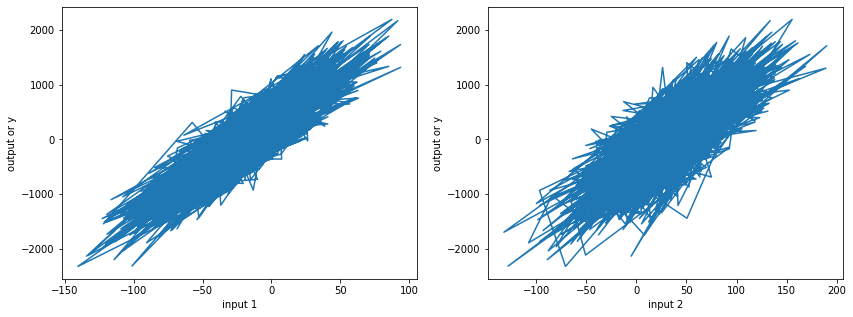

In [3]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.plot(data.input1, data.output)
plt.xlabel('input 1')
plt.ylabel('output or y')
plt.subplot(1,2,2)
plt.xlabel('input 2')
plt.ylabel('output or y')
plt.plot(data.input2, data.output)
plt.show()

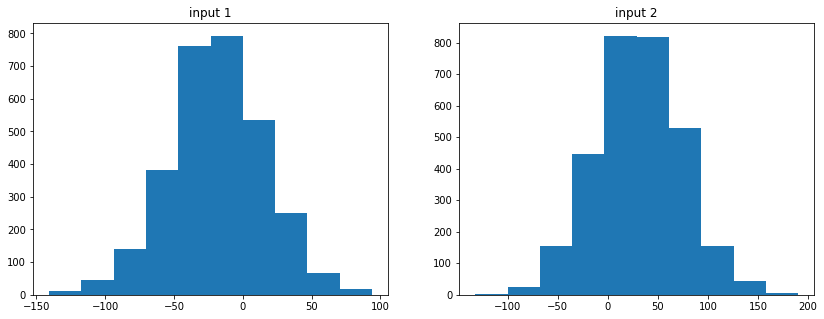

In [4]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.hist(data.input1)
plt.title('input 1')
plt.subplot(1,2,2)
plt.title('input 2')
plt.hist(data.input2)
plt.show()

### 3. Prepare the data for modelling. (8 points)

In [5]:
# Separate the data: input and output.
X_values = data[['input1', 'input2']].values
y_labels = data['output'].values
print(X_values.shape)
print(y_labels.shape)

(3000, 2)
(3000,)


In [6]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
# From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?
X_train_val, X_test, y_train_val, y_test = train_test_split(X_values, y_labels, test_size = .2, random_state = 42)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, test_size = .25, random_state = 42)
print(X_train_val.size, y_train_val.size)
print(X_train.size, y_train.size)
print(X_validate.size, y_validate.size)
print(X_test.size, y_test.size)

4800 2400
3600 1800
1200 600
1200 600


## Stratified Sampling is used to represent all the sub-groups in a population so that the test data has similar distribution to that of given data. Since the dataset provided was simple in nature (inputs part of normal distribution) stratified sampling is not required as per CLT because we are taking test sample greater than > 30 hence we obtain normal distribution for our test and validation data too.  

### 4. Modelling

#### 4.1. Linear Regression (8 points)

#### Model Training and Test predictions

In [7]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
l_reg = linear_model.LinearRegression()
model_l = l_reg.fit(X_train_val, y_train_val)
predictions = model_l.predict(X_test)
print('predictions :', predictions[:10])
print('actual :', y_test[:10])
print(l_reg.score(X_values,  y_labels))
mean_absolute_linear = mean_absolute_error(y_test, predictions)
mean_squared_linear = mean_squared_error(y_test, predictions)

predictions : [  61.23562991 -576.47400223 -112.4892831  -413.46017031  602.52161228
  -19.80815241 -172.96819682  601.27825731  -42.40641735  558.28390456]
actual : [  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47]
0.9481122579667594


#### Train Predictions and Error value calculations

In [8]:
predictions_train_linear = model_l.predict(X_train_val)
mean_squared_train_linear =  mean_squared_error(y_train_val, predictions_train_linear)
print('mean square error train', mean_squared_train_linear)
mean_abs_train_linear = mean_absolute_error(y_train_val, predictions_train_linear)
mean_absolute = {'linear' : mean_absolute_linear}
root_mean_squared = {'linear' : np.sqrt(mean_squared_linear)}
root_mean_squared_train = {'linear' : np.sqrt(mean_squared_train_linear) }
mean_absolute_train = {'linear' :mean_abs_train_linear }

mean square error train 22978.789626359343


#### 4.2. Ridge Regression (8 points)

#### Model Training and Test predictions

In [9]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

ridge = linear_model.Ridge()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1,5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 200, 1000, 1000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 120)
ridge_regressor.fit(X_train_val, y_train_val)

GridSearchCV(cv=120, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 200,
                                   1000, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [10]:
print(ridge_regressor.best_params_)
print('mean square error train', ridge_regressor.best_score_)
root_mean_squared_train['ridge'] = np.sqrt(- ridge_regressor.best_score_)

{'alpha': 200}
mean square error train -23035.16318711773


In [11]:
predictions_ridge = ridge_regressor.predict(X_test)
print('predictions :', predictions_ridge[:10])
print('actual :', y_test[:10])


predictions : [  61.23448513 -576.47810356 -112.49202298 -413.43276576  602.47071761
  -19.79834656 -172.94883522  601.24251202  -42.42937282  558.2611087 ]
actual : [  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47]


#### Train Predictions and Error value calculations

In [12]:
print(mean_absolute_error(y_test, predictions_ridge))
print(mean_squared_error(y_test, predictions_ridge))
mean_absolute['ridge'] = mean_absolute_error(y_test, predictions_ridge)
root_mean_squared['ridge'] = np.sqrt(mean_squared_error(y_test, predictions_ridge))
predictions_ridge_train = ridge_regressor.predict(X_train_val)
mean_absolute_train['ridge'] = mean_absolute_error(y_train_val, predictions_ridge_train)

118.72963108836018
22044.613085716323


#### 4.3. Lasso Regression (8 points)

#### Model Training and Test predictions

In [13]:
#from sklearn.utils.testing import ignore_warnings
#from sklearn.exceptions import ConvergenceWarning

In [14]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

lasso = linear_model.Lasso()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2,.1,.1412, .2, 1,1.5, 2, 5]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 100)
lasso_regressor.fit(X_train_val, y_train_val)
print(lasso_regressor.best_params_)
print('mean square error : ', - lasso_regressor.best_score_ )
root_mean_squared_train['lasso'] = np.sqrt(- lasso_regressor.best_score_)


C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27299950.694706086, tolerance: 103468.4078650268
  positive)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27279000.169207558, tolerance: 103144.14802671
  positive)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27276152.42328366, tolerance: 103296.77446996403
  positive)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

{'alpha': 0.1412}
mean square error :  23038.490996838234


In [15]:
predictions_lasso = lasso_regressor.predict(X_test)
print('predictions :', predictions_lasso[:10])
print('actual :', y_test[:10])


predictions : [  61.23482743 -576.4620654  -112.48626584 -413.46509155  602.53311245
  -19.81234585 -172.97387149  601.28307879  -42.3957145   558.28376887]
actual : [  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47]


#### Train Predictions and Error value calculations

In [16]:
print(mean_absolute_error(y_test, predictions_lasso))
print(mean_squared_error(y_test, predictions_lasso))
mean_absolute['lasso'] = mean_absolute_error(y_test, predictions_lasso)
root_mean_squared['lasso'] = np.sqrt(mean_squared_error(y_test, predictions_lasso))
predictions_lasso_train = lasso_regressor.predict(X_train_val)
mean_absolute_train['lasso'] = mean_absolute_error(y_train_val, predictions_lasso_train)

118.72805591561433
22044.364553552554


#### 4.4. ElasticNet Regression (8 points)

#### Model Training and Test predictions

In [17]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

elastic = linear_model.ElasticNet()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1,5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 200, 1000, 1000]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error', cv = 120)
elastic_regressor.fit(X_train_val, y_train_val)
print(elastic_regressor.best_params_)
print('mean square error train: ', -elastic_regressor.best_score_)
root_mean_squared_train['elastic'] = np.sqrt( -elastic_regressor.best_score_)


C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27331058.665407058, tolerance: 103570.76745788165
  positive)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27353897.035559077, tolerance: 103342.12335222423
  positive)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27352211.558574006, tolerance: 103581.62492958996
  positive)
C:\Users\shahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

{'alpha': 0.01}
mean square error train:  23035.164730205277


In [18]:
predictions_elastic = elastic_regressor.predict(X_test)
print('predictions :', predictions_elastic[:10])
print('actual :', y_test[:10])


predictions : [  61.2355399  -576.47399891 -112.48938992 -413.45854636  602.51864827
  -19.80762483 -172.96709782  601.27610396  -42.40763291  558.28246069]
actual : [  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47]


#### Train Predictions and Error value calculations

In [19]:
print(mean_absolute_error(y_test, predictions_elastic))
print(mean_squared_error(y_test, predictions_elastic))
mean_absolute['elastic'] = mean_absolute_error(y_test, predictions_elastic)
root_mean_squared['elastic'] = np.sqrt(mean_squared_error(y_test, predictions_elastic))
predictions_elastic_train = elastic_regressor.predict(X_train_val)
mean_absolute_train['elastic'] = mean_absolute_error(y_train_val, predictions_elastic_train)

118.72871277437017
22044.497740495306


### 5. Analysis (8 points)

In [20]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.


actual_array = y_test[:10]
linear_array =  predictions[:10]
ridge_array  = predictions_ridge[:10]
lasso_array  = predictions_lasso[:10]
elastic_array = predictions_elastic[:10]
dictionary1 = {'actual values' : actual_array, 'linear preds' :predictions[:10] , 'ridge preds' :predictions_ridge[:10],
             'lasso preds': predictions_lasso[:10] , 'elastic preds': predictions_elastic[:10] }

data2 = pd.DataFrame.from_dict(dictionary1)
print(data2)


   actual values  linear preds  ridge preds  lasso preds  elastic preds
0          66.12     61.235630    61.234485    61.234827      61.235540
1        -572.89   -576.474002  -576.478104  -576.462065    -576.473999
2         -94.71   -112.489283  -112.492023  -112.486266    -112.489390
3        -306.84   -413.460170  -413.432766  -413.465092    -413.458546
4         580.10    602.521612   602.470718   602.533112     602.518648
5         -34.05    -19.808152   -19.798347   -19.812346     -19.807625
6         -81.37   -172.968197  -172.948835  -172.973871    -172.967098
7         552.60    601.278257   601.242512   601.283079     601.276104
8         -24.39    -42.406417   -42.429373   -42.395714     -42.407633
9         538.47    558.283905   558.261109   558.283769     558.282461


### RMSE AND MAE

In [21]:
data1 = [mean_absolute_train, root_mean_squared_train, mean_absolute, root_mean_squared]
df = pd.DataFrame.from_dict(data1)
df.insert(loc = 0, column = 'error value', value = ['MEA TRAIN', 'RMSE TRAIN', 'MEA TEST', 'RMSE TEST'])
print(df)

  error value      linear       ridge       lasso     elastic
0   MEA TRAIN  120.779893  120.780383  120.779853  120.779923
1  RMSE TRAIN  151.587564  151.773394  151.784357  151.773399
2    MEA TEST  118.728665  118.729631  118.728056  118.728713
3   RMSE TEST  148.473880  148.474284  148.473447  148.473896


### 6. Final Observations (2 points)

### Write down your final conclusions/observations.

### Since the dataset is simple prediction values for all regressions are similar hence even the Mean Absolute Error and Root Mean Square Error values are similar but even in this simple dataset one can observe that linear regression is overfitting till some degree as train Mean Square Error for linear regression (22978.789626359343) is smallest amongst all regressions ( ridge : 23035.16318711773, lasso :  23038.490996838234 , elastic : 23035.164730205277). One can also notice absolute error is less for lasso than ridge and square error is less for ridge than lasso This is because of the power of their regularization term 
